# Machine learning Algorithms I


<div>
<img src="5_RF_figures/ML.png" width="800"/>
</div>

#### RF Tutorial Aims:

* Random Forest classification with scikit-learn
* How random forests work
* How to use them for regression
* How to evaluate their performance (& tune Hyper-parameters)

## 5 Decision Trees

In this notebook, we will implement a random forest in Python. We'll start with a single decision tree and a simple problem, and then work our way to a random forest. Once we understand how a single decision tree works, we can transfer this knowledge to an entire forest of trees.

> [Nice introductory video](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&t=528s)


### 5.1. What is a decision tree


<div>
<img src="5_RF_figures/Decisiontree.png" width="400"/>
</div>

A simple linear classifier will not be able to draw a boundary that separates the classes. The single decision tree will be able to completely separate the points because it essentially draws many repeated linear boundaries between points. A decision tree is a non-parametric model because the number of parameters grows with the size of the data.


**Decision tree pseudocode**
- Calculate Total Gini Impurity for all possible nodes or subdivisions.
- Select the node with the smallest total Gini impurity
- Go to the next decision level of a (sub)tree
- Repeat as required or until only ‘pure’ nodes are created



>**NOTE**: DTs are easy to built, use and interpret **BUT** they are limited!
>
>Their main disadvantage: INACCURAY! --> are not flexible with new samples


> **Exercise**: Building a Decision Tree from scratch
>
> First, a decision tree is to be generated by hand from the following admittedly rather artificial data set. 
 
| Clouds | Temperature | Rain | 
| :-: | :-: | :-: |
| yes   | mild       | yes   |
| no | mild       | no |
| yes   | cold       | no |
| no   | cold       | no |
| no | hot       | no |
| no | mild       | no |
| yes   | hot       | yes   | 


> The tree should give us the answer as to whether it is raining or not - so "rain" should close the tree as the leaf node. The first step is to determine whether "clouds" or "temperature" is a better choice for the first decision level, i.e. the root node of the tree.
>
>Gini impurity is used for this decision:
>
>\begin{eqnarray*}
Gini(D) = 1 - \sum_{i=1}^k p_i^2.
\end{eqnarray*}
>
>The running index "i" $\in$ [1,2] describes the target classes of the leaf nodes to be distinguished, in this case [rain-yes,rain-no]. The probability $p_1$ or $p_2$ is therefore the probability of rain or no rain in data set D.
>
>The total gini-impurity of a node which splits data set D with $n$ entries into e.g. 2 sub-data sets $D_a$ and $D_b$ with $n_a$ and $n_b$ entries respectively, is calculated from the weighted average of the respective individual gini-impurities:
>
>\begin{eqnarray*}
Gini(D) = \frac{n_a}{n} Gini(D_a) + \frac{n_b}{n} Gini(D_b),
\end{eqnarray*}
>
> where the indices $a$ and $b$ could stand for clouds=yes and clouds=no, for example.
>
> **Exercise 1A**:
> We now calculate the total gini-impurity of each of the following possible root nodes:
> 
> Clouds $=$ yes or no
> 
> Temperature $=$ cold, mild or hot
> **Exercise 1B**:
> The node with the lowest total Gini impurity is suitable as the first decision node or root node of the tree.
Determine the total Gini impurity for the first internal nodes of the 2 remaining discriminators, namely for the 2 branches of the root node.


In [1]:
### Your code here ####

#### solution

In [2]:
def gini(p1,p2):
    GI = 1 - (p1**2 + p2**2)
    return GI

In [3]:
## 1. cloud no
## results in: rain no --> 4 times, rain yes --> 0 times
p1 = 0/4 # rain no
p2 = 4/4 # rain yes

gini(p1,p2)

0.0

In [4]:
## 2. cloud yes
## results in: rain no --> 1 times, rain yes --> 2 times

p1 = 2/3 # rain yes
p2 = 1/3 # rain no 

gini(p1,p2)

0.4444444444444444

In [5]:
## Calculating total GINI Impurity for the node "clouds"

na = 4 # total entries of clouds no
nb = 3 # total entries of clouds yes

p1a = 0/4 # cloud no, rain no
p2a = 4/4 # cloud no, rain yes

p1b = 2/3 # cloud yes, rain yes
p2b = 1/3 # cloud yes, rain no 


def total_gini(p1a,p2a,p1b,p2b,na, nb):
    GI = na/(na+nb) * gini(p1a,p2a) + nb/(na+nb) * gini(p1b,p2b)
    return GI

total_gini(p1a,p2a,p1b,p2b,na, nb)



0.19047619047619047

Calculating total GINI Impurity for the node "temperature"

In [6]:
## 1. temperature cold 
## results in: rain no --> 2 times, rain yes --> 0 times

p1 = 0/2 # rain yes
p2 = 2/2 # rain no 

gini(p1,p2)

0.0

In [7]:
## 2. temperature mild 
## results in: rain no --> 2 times, rain yes --> 1 times

p1 = 1/3 # rain yes
p2 = 2/3 # rain no 

gini(p1,p2)

0.4444444444444444

In [8]:
## 2. temperature hot 
## results in: rain no --> 1 times, rain yes --> 1 times

p1 = 1/2 # rain yes
p2 = 1/2 # rain no 

gini(p1,p2)

0.5

### 5.2. Decision trees in Scikit-learn
Next, we  build and train a single decision tree on the data using Scikit-Learn. The tree will learn how to separate the points, building a flowchart of questions based on the feature values and the labels. At each stage, the decision tree makes splits by maximizing the reduction in Gini impurity.  We'll use the default hyperparameters for the decision tree which means it can grow as deep as necessary in order to completely separate the classes. This will lead to overfitting because the model memorizes the training data, and in practice, we usually want to limit the depth of the tree so it can generalize to testing data.

In [9]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

ModuleNotFoundError: No module named 'sklearn'

In [10]:
# load data

data = {'clouds': [1, 0, 1, 0,0,0,1], 'temp': [10, 20, -3, -5,25,10,30], 'rain': [1, 0, 0, 0,0,0,1]}
df = pd.DataFrame.from_dict(data)
df

,clouds,temp,rain
0,1,10,1
1,0,20,0
2,1,-3,0
3,0,-5,0
4,0,25,0
5,0,10,0
6,1,30,1


In [11]:
#split dataset in features and target variable
feature_cols = ['clouds', 'temp']
X = df[feature_cols] # Features
y = df.rain # Target variable

#X = df.iloc[:, :-1].values
#y = df.iloc[:, -1].values

In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test



In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


y_train_pred = clf.predict(X_train)

In [14]:
# Model Accuracy based on training data, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 1.0


[Text(0.5, 0.75, 'clouds <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

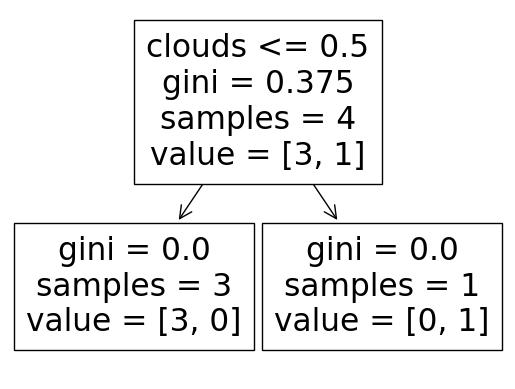

In [15]:
tree.plot_tree(clf, feature_names=feature_cols)

In [16]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Model Accuracy, how often is the classifier correct based on the test data?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [17]:
print(clf.predict([[0,-5]])) ##clouds, temp

[0]


/opt/anaconda3/envs/lehre/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## 5.2. Random Forests

### 5.2.1. What is a Random Forest?

<div>
<img src="5_RF_figures/RF.png" width="500"/>
</div>

* RF are built by combining mulitple DT (ensemble of decision trees to predict target variables)
* RFs combine simplicity of DTs with flexiblity --> therefore improved accuracy
* RFs are for supervised machine learning, where there is a labeled target variable.
* RFs can be used for solving regression (numeric target variable) and classification (categorical target variable) problems.
* RFs are an ensemble method, meaning they combine predictions from other models.

<div style="display:flex; align-items: center;padding:70px;">
<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*gFYWIpNETvxjYMKBXTh0Qw.jpeg
" width="500"/>
</div>

(figure by [Kohari 2020](https://medium.com/nerd-for-tech/the-ideal-workflow-for-your-machine-learning-project-9df1a7125b17) )



#### How does it work?

A Random forest regression model combines multiple decision trees to create a single model. Each tree in the forest builds from a different subset of the data and makes its own independent prediction. The final prediction for input is based on the average or weighted average of all the individual trees’ predictions.

> [Read here more on the theory.](https://www.analytixlabs.co.in/blog/random-forest-regression/#:~:text=using%20various%20techniques.-,Evaluating%20Random%20Forest%20Regression%20Performance,such%20as%20accuracy%20and%20precision.)
> 
> [Nice introductory video](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ)

##### Step by Step: 

* 1. Create a "bootstrapped" dataset.
    * Randomly select samples from the original dataset. The same sample can be picked more than once.
* 2. Create a decision tree using that "bootstrapped" dataset. But only use a random subset of variables (columns) at each step.
*  3. Go back to 1 and repeat. Make a new bootstrapped dataset and built a tree on a subset of variables, resulting in a variaty of trees.
* 4. Running new data down all of the trees, results in a "vote" for the target variable.

> **Terminology**:
>> **Bagging**: **B**ootstrapping + Using the **Agg**regate to make a decision



#### Evaluation:

* 1/3 of the data does not end up in the "bootstrapped" dataset = **Out-Of-Bag** Dataset
* Evaluate all trees with the  **Out-Of-Bag** Dataset,
* proportion of incorrectly classified samples = **Out-Of-Bag Error** , **OOB**

> ### **Exercise**: Building a Random Forest
>
> Now, we will built a Random Forest by revisiting the above example.
> Split data into target and features and perform the train-test-split (70-30).

In [18]:
# load data

data = {'clouds': [1, 0, 1, 0,0,0,1], 'temp': [10, 20, -3, -5,25,10,30], 'rain': [1, 0, 0, 0,0,0,1]}
df = pd.DataFrame.from_dict(data)
df


,clouds,temp,rain
0,1,10,1
1,0,20,0
2,1,-3,0
3,0,-5,0
4,0,25,0
5,0,10,0
6,1,30,1


In [19]:
#### your code here ####

#### solution

In [20]:
#split dataset in features and target variable
feature_cols = ['clouds', 'temp']
X = df[feature_cols] # Features
y = df.rain # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


### Model
 > Build the Random Forest Classfier an fit the model

In [21]:
# Importieren von Modulen/Bibliotheken
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# Initialwert und Anzahl der Bäume für den Random Forest festlegen
seed = 196
n_estimators = 1000

# RandomForest erstellen, X und y definieren und Modell trainieren
model = RandomForestClassifier(n_estimators = n_estimators, random_state = seed, max_features = 1.0,
                               min_samples_split = 2, min_samples_leaf = 1, max_depth = None, oob_score=True)
model.fit(X_train, y_train)

RandomForestClassifier(max_features=1.0, n_estimators=1000, oob_score=True,
                       random_state=196)

> **Exercise**: Evaluate the Random Forest
>
> Calculte the RMSE, OOB Score and plot the feature importance. Which one is more important to predict rain?

In [22]:
#### your code here ####

#### solution

In [23]:
# Mittelwert der quadrierten Residuen und erklärte Varianz ausgeben lassen
print(f"Mean of squared residuals: {model.score(X, y)}")
print(f"% Var explained: {model.score(X, y) * 100}")


print(f"% OOB score: {1 - model.oob_score_}")

Mean of squared residuals: 0.8571428571428571
% Var explained: 85.71428571428571
% OOB score: 0.25


In [24]:
# Statistiken über das Modell ausgeben lassen und die 10 wichtigsten Variablen extrahieren
stats = model.get_params()
feature_importance = model.feature_importances_
features = X.columns
var_imp_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
var_imp_df = var_imp_df.sort_values(by = 'Importance', ascending = False).head(54)
var_imp_10 = var_imp_df.head(10)

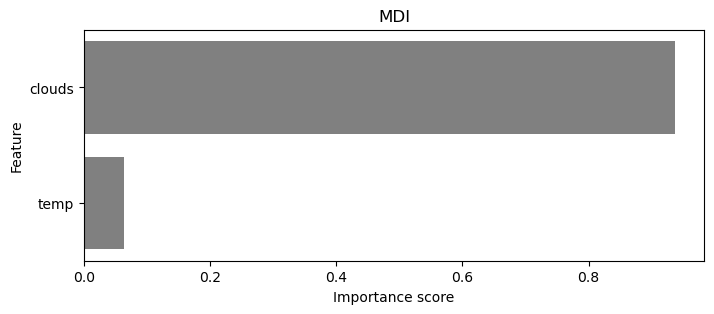

In [25]:
# Plotten der wichtigsten Variablen
plt.figure(figsize = (8, 3))
sns.barplot(x = 'Importance', y = 'Feature', data = var_imp_10, color = 'gray')
plt.title("MDI")
plt.xlabel("Importance score")
plt.ylabel("Feature")

plt.show()


### 5.2.2. Application example: 
### Random Forest Regression Analysis of Stable Water Isotope Variability in Southern Africa’s Precipitation

**Geppert, Marielle; Hartmann, Kai; Kirchner, Ingo; Pfahl, Stephan; Struck, Ulrich; Riedel, Frank (2022). Precipitation Over Southern Africa: Moisture Sources and Isotopic Composition. JGR: Atmospheres, https://doi.org/10.1029/2022JD037005**

#### Context of the Study
Southern Africa is characterized by arid and semi-arid landscapes and is particularly susceptible to extreme weather conditions. Intriguingly, over the last 100,000 years, extensive lakes have periodically formed in the central Kalahari desert, raising questions about historical changes in atmospheric circulation and precipitation patterns.

Geppert et al. conducted a study about the annual precipitation distributions throughout Southern Africa. They focused on the analysis of stable water isotope compositions, moisture transport pathways, and moisture sources.

Stable isotopes of hydrogen and oxygen (such as <sup>2</sup>H and <sup>18</sup>O) in water molecules vary slightly based on their source and the environmental conditions they have been through. By analyzing these isotopes, it is possible to trace the origins of water sources and to understand the pathways of moisture transport.


Changes in stable isotope ratios in precipitation can reveal shifts in atmospheric circulation patterns and climate. For instance, when water evaporates from the ocean, water molecules containing heavier isotopes of oxygen (<sup>18</sup>O) and hydrogen (<sup>2</sup>H or deuterium) are more likely to remain in the ocean. This results in a higher concentration of these heavier isotopes in the ocean, which is reflected in the δ<sup>2</sup>H and δ<sup>18</sup>O ratios of the ocean water. As the evaporated water forms precipitation and moves inland, separation continues and and further changes isotopic ratios occur. Analyzing these isotopic variations helps to reconstruct past precipitation regimes and thus provides insights into historical patterns of atmospheric circulation.

---

### 5.2.2.1. Data Collection
The study involved collecting water samples of precipitation and different surface waters in southern Africa between 2016 and 2021. The map shows the sampling locations and the sample type, which is: ocean, spring, lake, precipitation and river. Furthermore, the data of eight Global Network for Isotopes in Precipitation (GNIP) stations has been used.



<div>
<img src="5_RF_figures/bild1.png" width="700"/>
</div>

**Sample locations**

The data set and further information about the sampling process can be found
[here](https://doi.pangaea.de/10.1594/PANGAEA.944811).


Let us take a closer look at the data:

In [26]:
# Importieren der pandas- und requests-Bibliothek sowie des StringIO-Moduls
import pandas as pd
import requests
from io import StringIO

# Daten über URL einlesen
url = "https://doi.pangaea.de/10.1594/PANGAEA.944811?format=textfile"

response = requests.get(url)
IsoW06 = pd.read_csv(StringIO(response.text), sep = '\t', skiprows = 267, header = 1, encoding = "UTF-8", 
                     engine = 'python', on_bad_lines = 'skip')

In [27]:
# Anzeigen der ersten 6 Dateneinträge
IsoW06.head(6)

,Event,Sample ID,Latitude,Longitude,Date/Time,Samp type,Sample comment,δ18O H2O [‰ SMOW],δD H2O [‰ SMOW],δ18O H2O std dev [±],δD H2O std dev [±]
0,WaterSA_SLW1,SLW1,-33.88917,18.96917,2016-08-29,River,River at Pniel,-3.54,-14.50,0.09,0.64
1,WaterSA_SLW2,SLW2,-33.87800,19.03517,2016-08-29,River,River Berg; abundant with insect larvae; dam u...,-3.33,-13.62,0.09,0.45
2,WaterSA_SLW3,SLW3,-33.93667,19.17000,2016-08-29,River,Minor waterfall; iron rich,-4.44,-22.33,0.04,0.59
3,WaterSA_SLW4,SLW4,-33.69350,19.32483,2016-08-29,River,River; abundant with insect larvae,-4.28,-22.70,0.07,0.30
4,WaterSA_SLW5,SLW5,-33.54333,19.20733,2016-08-29,River,River Bree,-4.09,-18.99,0.04,0.34
5,WaterSA_SLW6,SLW6,-33.33367,19.87767,2016-08-30,Lake,Reservoir lake; under almost natural condition...,-2.59,-18.59,0.10,0.29


The data set contains 188 samples and the following 11 variables: 
Event, Sample ID, Latitude, Longitude, Date/Time, Samp type, Sample comment, δ18O H2O [‰ SMOW], δD H2O [‰ SMOW], δ18O H2O std dev [±], δD H2O std dev [±]. The isotope ratios are expressed in the conventional delta notation (δ18O, δ2H) in per mil (‰) relative to VSMOW ([Vienna Standard Mean Ocean Water](https://en.wikipedia.org/wiki/Vienna_Standard_Mean_Ocean_Water).

## The Random Forest Algorithm in the Study

The Random Forest (RF) algorithm is applied to assess the relative importance of various meteorological variables on the stable isotope data.  In the following, the assessment will be showcased using the δ18O isotope data.

In [28]:
# Daten über CSV-Datei einlesen
data = pd.read_csv('data/Geppert2019.csv',  header = 0, sep = ',')
data.head(10)

,Unnamed: 0,Prc.sum,expl.frac,wmSrc_time,wmSrc_lon,wmSrc_lat,wmSrc_p,wmSrc_Z,wmSrc_nocfblh,wmSrc_T,...,d.Excess,Forest_clr,Shrub_clr,Cropland_clr,Bare_clr,Water_clr,Artificial_clr,Africa_clr,Oceans_clr,Land.Ocean
0,WindhoekRain1a,0.574,0.603013,-76.130927,29.245991,-23.035312,871.342003,694.411111,1021.346620,292.555136,...,-4.059881,-1.517663,1.453249,-0.695324,0.000000,0.759738,0.000000,0.428173,-0.428173,2.354542
1,WindhoekRain1b,1.096,0.665205,-34.405764,19.525194,-24.792405,664.200803,1206.945260,2468.776380,279.305811,...,-3.872396,-1.937226,3.378475,-1.266330,0.000000,-0.174919,0.000000,1.783907,-1.783907,35.439059
2,SLW17,0.306,0.344190,-94.394760,18.270465,-16.737341,736.231922,1112.256963,1793.536028,284.145281,...,14.916198,-0.980465,3.717838,2.522631,-1.714832,-3.545172,0.000000,3.768850,-3.768850,1877.508391
3,SLW37A,3.305,0.749121,-58.641022,9.708659,-34.783328,944.772791,13.408723,898.147575,282.349207,...,11.104825,-0.808416,1.153859,-4.880725,0.000000,4.535282,0.000000,-1.559795,1.559795,0.044175
4,SLW37B,3.305,0.749121,-58.641022,9.708659,-34.783328,944.772791,13.408723,898.147575,282.349207,...,11.330050,-0.808416,1.153859,-4.880725,0.000000,4.535282,0.000000,-1.559795,1.559795,0.044175
5,SLW38,1.615,0.670495,-34.216661,3.292538,-38.743589,891.270406,0.108741,1221.541707,274.324646,...,11.755963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,SSW3,4.967,0.702557,-58.854549,28.213287,-28.006658,844.783013,782.590397,1205.951246,287.805903,...,17.335391,-0.138846,1.061635,0.431606,0.000000,0.660072,-2.014466,0.509237,-0.509237,2.768968
7,SSW4,1.251,0.817562,-48.639428,25.726168,-34.903119,926.250676,97.533008,1294.900613,283.522457,...,17.027702,0.802012,-1.820359,-1.395269,0.000000,2.413617,0.000000,-0.739795,0.739795,0.227731
8,18K5,1.522,0.803389,-47.940960,22.457156,-20.811032,720.532136,1080.644353,2132.760221,284.671558,...,-16.507701,0.874735,3.158653,0.297624,-4.663009,0.331997,0.000000,1.502129,-1.502129,20.171245
9,19KHW01,0.680,0.482168,-86.869796,33.717301,-24.581715,853.937486,465.596535,1058.317889,289.373170,...,13.263076,0.697861,0.372231,0.242635,0.000000,1.298041,-2.610768,0.146807,-0.146807,1.341265


We will rename the variables mw18O to O18(=δ<sup>18</sup>O) for clarity and variables mwdD (=δ<sup>2</sup>H) and d.Excess are removed to focus on the O18 isotopes. Furthermore, we remove the country of sample origin.

In [29]:
# zwei Variablen umbenennen und mehrere Variablen entfernen 
data.rename(columns = {'mw18O': 'O18', 'Monat': 'month'}, inplace = True)  
data = data.drop(columns = ["mwdD", "d.Excess", "Land.Ocean", "Africa", "Oceans", "ISO"])

Then the data is subset, including only data where the explanatory fraction is greater than 0.6:

In [30]:
# Daten mit einer explanatory fraction größer als 0,6 extrahieren (Wert zeigt, wie gut die Abhängigkeit der Variablen 
# erklärt werden kann - 0 erklärt keine Variation - 1 erklärt jede Variation)
IsoW06 = data[data["expl.frac"] > 0.6]

### Initial Model

We start with a performance test on our data for the RF algorithm by creating an initial RF model using the RandomForestRegressor() function. It predicts δ18O based on all other variables in IsoW06 with 2000 trees.

In [31]:
# Importieren von Modulen/Bibliotheken
from sklearn.preprocessing import OrdinalEncoder

# NaN-Werte entfernen und den Datentyp von vier Variablen von kategorisch in numerisch umzuwandeln (Voraussetzung 
# für das Machine Learning)
IsoW06 = IsoW06.dropna()
ord_enc = OrdinalEncoder()
IsoW06["Unnamed: 0"] = ord_enc.fit_transform(IsoW06[["Unnamed: 0"]])
IsoW06["Type_main"] = ord_enc.fit_transform(IsoW06[["Type_main"]])
IsoW06["type"] = ord_enc.fit_transform(IsoW06[["type"]])
IsoW06["RFZraster"] = ord_enc.fit_transform(IsoW06[["RFZraster"]])

# Eingangs- (X, alle Variablen außer O18) und Zieldaten (y, Variable O18) definieren
X = IsoW06.drop('O18', axis = 1)
y = IsoW06['O18']

In [32]:
IsoW06

,Unnamed: 0,Prc.sum,expl.frac,wmSrc_time,wmSrc_lon,wmSrc_lat,wmSrc_p,wmSrc_Z,wmSrc_nocfblh,wmSrc_T,...,RFZraster,NEAR_DIST,Forest_clr,Shrub_clr,Cropland_clr,Bare_clr,Water_clr,Artificial_clr,Africa_clr,Oceans_clr
0,115.0,0.574,0.603013,-76.130927,29.245991,-23.035312,871.342003,694.411111,1021.346620,292.555136,...,2.0,262741.747287,-1.517663,1.453249,-0.695324,0.000000,0.759738,0.000000,0.428173,-0.428173
1,116.0,1.096,0.665205,-34.405764,19.525194,-24.792405,664.200803,1206.945260,2468.776380,279.305811,...,2.0,262741.747287,-1.937226,3.378475,-1.266330,0.000000,-0.174919,0.000000,1.783907,-1.783907
3,93.0,3.305,0.749121,-58.641022,9.708659,-34.783328,944.772791,13.408723,898.147575,282.349207,...,3.0,363.028079,-0.808416,1.153859,-4.880725,0.000000,4.535282,0.000000,-1.559795,1.559795
4,94.0,3.305,0.749121,-58.641022,9.708659,-34.783328,944.772791,13.408723,898.147575,282.349207,...,3.0,363.028079,-0.808416,1.153859,-4.880725,0.000000,4.535282,0.000000,-1.559795,1.559795
5,95.0,1.615,0.670495,-34.216661,3.292538,-38.743589,891.270406,0.108741,1221.541707,274.324646,...,3.0,363.028079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,63.0,19.103,0.612427,-62.346271,23.349875,-25.932854,770.535546,970.378084,1426.975181,287.379067,...,2.0,455828.079268,1.324877,3.216815,1.091741,-2.110680,1.458092,-4.980846,1.021922,-1.021922
181,62.0,70.164,0.643656,-90.496727,23.231040,-20.117087,840.166099,764.910192,928.522394,290.334610,...,2.0,532691.621362,2.230248,2.812133,0.541133,-0.903399,2.246005,-6.926121,0.551981,-0.551981
183,64.0,14.502,0.631004,-71.553538,20.536697,-27.599559,790.272270,891.810876,1304.393974,286.186656,...,2.0,280031.495406,-0.108052,2.541575,0.352612,-0.987445,1.587161,-3.385851,0.578221,-0.578221
186,65.0,19.259,0.604492,-106.225646,20.371161,-17.675182,825.334945,950.122791,820.371666,290.507415,...,2.0,263416.081160,1.876198,2.942024,0.494967,0.343386,1.484240,-7.140816,0.939047,-0.939047


In [33]:
# Importieren von Modulen/Bibliotheken
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialwert und Anzahl der Bäume für den Random Forest festlegen
seed = 196
n_estimators = 2000

# RandomForest erstellen, X und y definieren und Modell trainieren
model = RandomForestRegressor(n_estimators = n_estimators, random_state = seed, max_features = 1.0,
                               min_samples_split = 2, min_samples_leaf = 1, max_depth = None)
model.fit(X, y)

RandomForestRegressor(n_estimators=2000, random_state=196)

In [34]:
# Mittelwert der quadrierten Residuen und erklärte Varianz ausgeben lassen
print(f"Mean of squared residuals: {model.score(X, y)}")
print(f"% Var explained: {model.score(X, y) * 100}")


Mean of squared residuals: 0.8767223380076956
% Var explained: 87.67223380076956


In each split of a tree, 18 variables were randomly chosen to determine the best split. About <font color='royalblue'>87.67% </font> of the variability in the δ18O values can be explained by the model.



By visualizing the model performance, we can observe how error decreases with the number of trees.

In [35]:
# DAUERT 2-3 Minuten!
# Liste und Schleife für die Durchführung des Models mit unterschiedlichen Anzahlen an Bäumen erstellen
n_estimators_range = list(range(1, 2001, 50))
errors = []
oob_error =  []

for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators = n_estimators, random_state = seed, oob_score = True)
    model.fit(X, y)
    errors.append(model.score(X, y))
    oob_error.append(1- model.oob_score_)
  #  mse = mean_squared_error(labels, y_pred)
#    mse_scores.append(mse)

/opt/anaconda3/envs/lehre/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


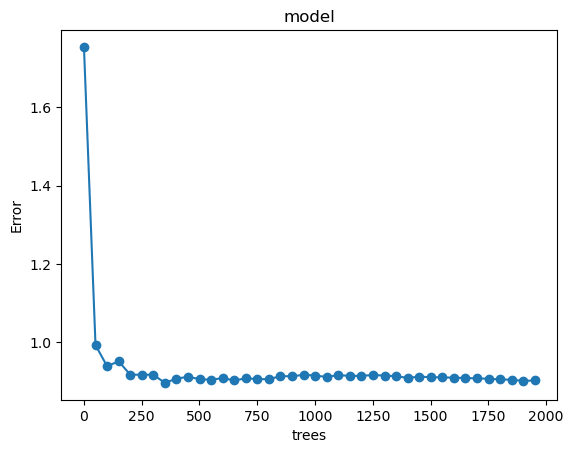

In [36]:
# Importieren von Modulen/Bibliotheken
import matplotlib.pyplot as plt

# Plotten der error-Werte in Abhängigkeit der Anzahl der Bäume des Random Forests, um optimalen n_estimators-Wert festzulegen
plt.plot(n_estimators_range, oob_error, marker = 'o')
plt.xlabel('trees')
plt.ylabel('Error')
plt.title('model')
plt.show()

As shown in the figure, the mean squared residuals stabilize around **500 trees**. Thus, in the following step we use `n_estimators=500` and optimize the tree depth.

### Hyper-parameter Tuning

To look at the available hyperparameters, we can examine the default values of our random forest model.

In [37]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 1951,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 196,
 'verbose': 0,
 'warm_start': False}

That is quite a long list! How do we know where to start? A good place is the documentation on the random forest in Scikit-Learn. This tells us the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features). 

* **n_estimators** = number of trees in the foreset
* **max_features** = max number of features considered for splitting a node
* **max_depth** = max number of levels in each decision tree
* **min_samples_split** = min number of data points placed in a node before the node is split
* **min_samples_leaf** = min number of data points allowed in a leaf node
* **bootstrap** = method for sampling data points (with or without replacement)

We could go read the research papers on the random forest and try to theorize the best hyperparameters, but a more efficient use of our time is just to try out a wide range of values and see what works! 


#### max_features
Now, we will tune the parameter that determines the number of variables that are randomly sampled as candidates at each split (max_features). The numbers of trees and variables are crucial for the model performance. The authors applied a range of **max_features from 1 to 52** while n_estimators is fixed at **500**after [Behnamian et al. 2017](https://doi.org/10.1109/LGRS.2017.2745049) (a large number of trees ensures stable variable importance). This grid represents different combinations of hyper-parameters to be tested. In our example we used the above identified threshold of **n_estimators =500** and **max_features =2:54**. 

In [38]:
# Importieren von Modulen/Bibliotheken
import numpy as np

# Initialwert und Anzahl der Bäume für den Random Forest festlegen und Zufallszahlengenerator laufen lassen
seed = 196
n_estimators = 500
np.random.seed(seed)

# Hyperparameteroptimierung für das Modell durchführen und Identifikation der besten Modelle (bzgl. OOB-RMSE)
max_features_range = list(range(1, 54, 2))
hyper_grid = {'max_features': max_features_range, 'n_estimators': [n_estimators] * len(max_features_range), 'OOB_RMSE': [0] * len(max_features_range)}

for i, params in enumerate(max_features_range):
    model = RandomForestRegressor(n_estimators = n_estimators, max_features = params, oob_score = True, random_state = seed)
    model.fit(X, y)
    hyper_grid['OOB_RMSE'][i] = model.oob_score_
    
hyper_grid_df = pd.DataFrame(hyper_grid)
hyper_grid_df = hyper_grid_df.sort_values(by = 'OOB_RMSE')#.head(10)


In [39]:
hyper_grid_df

,max_features,n_estimators,OOB_RMSE
24,49,500,0.118201
25,51,500,0.118908
26,53,500,0.119480
22,45,500,0.122229
19,39,500,0.128771
23,47,500,0.130930
21,43,500,0.132708
18,37,500,0.135617
20,41,500,0.140131
17,35,500,0.150517


For each parameter combination, the [Out-of-Bag](https://en.wikipedia.org/wiki/Out-of-bag_error) (OOB) error is calculated. The best model with <font color='royalblue'>500 trees</font> has an <font color='royalblue'>max_features value of 49 (OOB_RMSE: 0.118201).</font> 

### Final Model

Now, the final RF model with optimized parameters can be created. The varimp() function is used to calculate the importance of each variable in the model. This tells us which variables are most predictive of O18.

In [40]:
# Importieren von Modulen/Bibliotheken
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Initialwert und Anzahl der Bäume für den Random Forest festlegen und Zufallszahlengenerator laufen lassen
seed = 196
n_estimators = 500
np.random.seed(seed)

In [41]:
# Optimalen max_features-Wert finden (Anzahl der zu betrachtenden, zufällig ausgewählten Features für jeden Baum)
min_idx = np.argmin(hyper_grid['OOB_RMSE'])
max_features = hyper_grid['max_features'][min_idx]

In [42]:
# Finales RandomForest erstellen und trainieren
model = RandomForestRegressor(n_estimators = n_estimators, max_features = max_features, random_state = seed)
model.fit(X, y)

RandomForestRegressor(max_features=49, n_estimators=500, random_state=196)

In [43]:
# Statistiken über das Modell ausgeben lassen und die 10 wichtigsten Variablen extrahieren
stats = model.get_params()
feature_importance = model.feature_importances_
features = X.columns
var_imp_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
var_imp_df = var_imp_df.sort_values(by = 'Importance', ascending = False).head(54)
var_imp_10 = var_imp_df.head(10)

In [44]:
# RMSE (Root Mean Square Error) und R² (R-squared) für Bewertung des Modells extrahieren
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

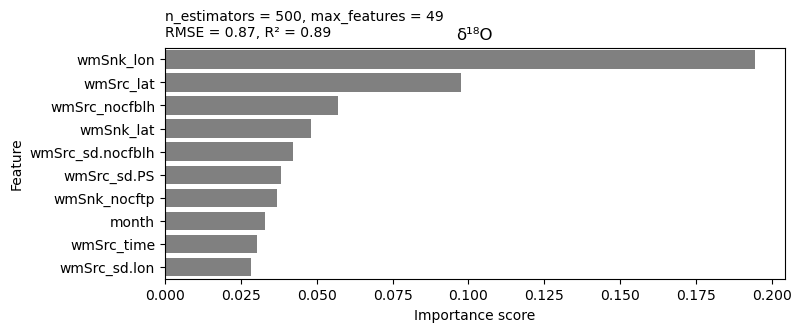

In [45]:
# Plotten der wichtigsten Variablen
plt.figure(figsize = (8, 3))
sns.barplot(x = 'Importance', y = 'Feature', data = var_imp_10, color = 'gray')
plt.title("δ¹⁸O")
plt.xlabel("Importance score")
plt.ylabel("Feature")
plt.text(0, -1.5, f"n_estimators = {n_estimators}, max_features = {max_features}\nRMSE = {rmse:.2f}, R² = {r2:.2f}", 
         fontsize = 10, ha = 'left', va = 'center')
plt.show()

The variable abbreviations shown in the plot have the following meanings:
- <b>wmSnk_lon</b>: longitude at sampling site
- <b>wmSrc_lat</b>: latitude
- <b>wmSrc_nocfblh</b>: boundary layer height
- <b>wmSnk_lat</b>: latitude at sampling site
- <b>wmSrc_sd.nocfblh</b>: boundary layer height
- <b>wmSrc_sd.PS</b>: surface pressure difference
- <b>month</b>: month of sampling
- <b>wmSnk_nocftp</b>: total precipitation at sampling site
- <b>Type_main</b>: main water type
- <b>wmSrc_sd.lon</b>: longitude

For predicting the δ18O ratio, <font color='royalblue'>the longitude at sampling site seems to be the most important variable, among latitude at target location, boundary layer height and latitude at sampling site.</font>

---

#### Citation
The E-Learning project SOGA-R was developed at the Department of Earth Sciences by Kai Hartmann, Joachim Krois and Annette Rudolph. You can reach us via mail by [soga[at]zedat.fu-berlin.de](soga@zedat.fu-berlin.de).

<img src="./bild2.png" alt="CC-BY-SA" style="float: left; margin-right: 10px;" /> &nbsp;

You may use this project freely under the [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/). &nbsp;

Please cite as follow: *Hartmann, K., Krois, J., Rudolph, A. (2023): Statistics and Geodata Analysis using R ([SOGA-R](https://www.geo.fu-berlin.de/soga-r)). Department of Earth Sciences, Freie Universitaet Berlin.*


#### Ressources for this script: 

* [Koehrsen 2010](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)
